# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> Kevin Liu </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
df.columns = [c.replace(' ', '_') for c in df.columns]
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth_Error', 'Depth_Seismic_Stations', 'Magnitude', 'Magnitude_Type', 'Magnitude_Error', 'Magnitude_Seismic_Stations', 'Azimuthal_Gap', 'Horizontal_Distance', 'Horizontal_Error', 'Root_Mean_Square', 'ID', 'Source', 'Location_Source', 'Magnitude_Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [4]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth_Error,Depth_Seismic_Stations,Magnitude,Magnitude_Type,...,Magnitude_Seismic_Stations,Azimuthal_Gap,Horizontal_Distance,Horizontal_Error,Root_Mean_Square,ID,Source,Location_Source,Magnitude_Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [5]:

condition = df['Latitude'] > 0
df.loc[condition, 'Hemisferio'] = 'Norte'
df.loc[~condition, 'Hemisferio'] = 'Sul'
#df.loc[condition, 'Critério'] = 'Latitude positiva'
#df.loc[~condition, 'Critério'] = 'Latitude negativa'
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth_Error,Depth_Seismic_Stations,Magnitude,Magnitude_Type,...,Azimuthal_Gap,Horizontal_Distance,Horizontal_Error,Root_Mean_Square,ID,Source,Location_Source,Magnitude_Source,Status,Hemisferio
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte


## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

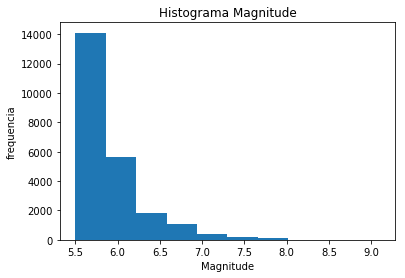

In [6]:
plt.hist(df.Magnitude,bins=10)
plt.title("Histograma Magnitude")
plt.ylabel("frequencia")
plt.xlabel("Magnitude")

Podemos observar pelo histograma de magnitude que é mais frequente terremotos de magnitude menores e que essa frequencia cai a medida que se aumenta a magnitude dos teremotos.

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [7]:
loc, scale =stats.expon.fit(df["Magnitude"])
print(loc, scale)

5.49999999967 0.382548648851


Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

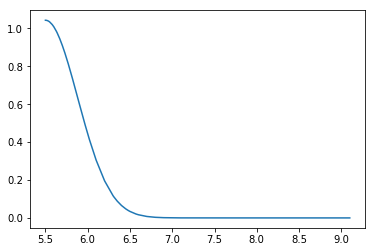

In [8]:
plt.plot(sorted(df["Magnitude"]),stats.norm.pdf(sorted(df["Magnitude"]),loc = loc,scale=scale))

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [9]:
ct = pd.crosstab(df.Hemisferio,df.Type,normalize=True)
ct

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst
Hemisferio,,,,
Norte,0.447121,0.000085,0.006279,0.000000
Sul,0.545191,0.000085,0.001196,0.000043


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [10]:
norte_terre = len(df[(df["Hemisferio"]=="Norte")& (df["Type"]=="Earthquake")])
total = len(df.Type)

P = norte_terre/total
Porct = P*100
print("Probabilidade de acontecer um terremoto no hemisferio Norte é igual",Porct,"%")

Probabilidade de acontecer um terremoto no hemisferio Norte é igual 44.71211344609602 %


Explique o seu raciocínio

A probabilidade de acontecer um terremoto no hemisferio Norte é o numero de terremotos no hemisferio norte dividido pelo espaço amostral.

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [11]:
Nuclear_Norte = len(df[(df["Hemisferio"]=="Norte")&(df["Type"]=="Nuclear Explosion")]) 
total_norte = len(df[df["Hemisferio"]=="Norte"])

P_nuclear = Nuclear_Norte/total_norte
P_nuclear_porct = P_nuclear *100
print("A propabilidade de acontecer uma Nuclear Explosion no Norte é de",P_nuclear_porct,"%")

A propabilidade de acontecer uma Nuclear Explosion no Norte é de 1.3845719129697656 %


Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é  de aproximadamente 1.38%.

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude_Error`  e `Depth`

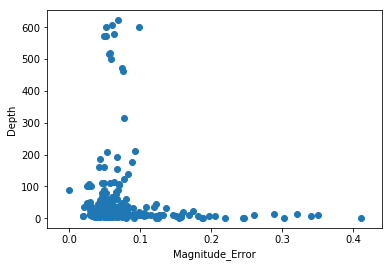

In [12]:
plt.scatter(df.Magnitude_Error,df.Depth)
plt.xlabel("Magnitude_Error")
plt.ylabel("Depth")
#plt.show()

Calcule a correlação entre as variáveis `Magnitude_Error`  e `Depth`

In [23]:
df["Magnitude_Error"].corr(df["Depth"])

-0.076918438923387192

Explique o que significa o valor da correlação calculada acima? 

O valor da correlação calculada acima significa que a relação entre essas duas variaveis é baixo,ou seja o erro de magnitude não é influenciado pela profundidade.

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64


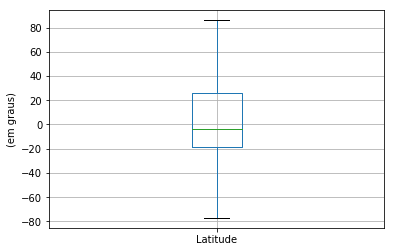

In [28]:
print(df.Latitude.describe())
plot2 = df.boxplot(column="Latitude")
plt.ylabel("(em graus)")

##### Describe:
mean:media das latitudes analisadas ;
std: desvio padrão medio ;
min: menor valor que ocorre um abalo sismico;
max: maior valor que ocorreu um abalo sismico;
25%: significa que 25% dos abalos sismicos que ocorreram estão abaixo dessa latitude ;
50%: significa que 50% dos abalos sismicos que ocorreram estão abaixo desse latitude ;
50%: significa que 75% dos abalos sismicos que ocorreram estão abaixo desse latitude ;

###### Isso é igual para a logitude ,em vez dos valores correponderem a latitudes irao corresponder a lognitudes.

##### Boxplot
base inferior do bloco: Q1 = 25%;
base superior do bloco: Q3 = 75%;
linha entre base inferior e basei superior do bloco: é a média das latitudes;
###### Isso é igual para a logitude ,em vez dos valores correponderem a latitudes irao corresponder a lognitudes.

count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64


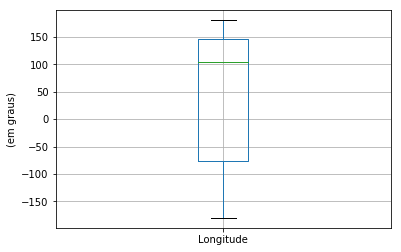

In [29]:
print(df.Longitude.describe())
plot2 = df.boxplot(column="Longitude")
plt.ylabel("(em graus)")

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [30]:
cross = pd.crosstab(df.Hemisferio,df.Magnitude_Type)
cross

Magnitude_Type,MB,MD,MH,ML,MS,MW,MWB,MWC,MWR,MWW
Hemisferio,,,,,,,,,,
Norte,1684,6,5,77,766,3684,1112,2389,12,879
Sul,2077,0,0,0,936,4038,1346,3280,14,1104


In [31]:
MB_Sul = len(df[(df['Hemisferio']=="Sul")&(df["Magnitude_Type"]=="MB")])
MB_Norte = len(df[(df['Hemisferio']=="Norte")&(df["Magnitude_Type"]=="MB")])
total_magnitude_type = len(df.Magnitude_Type)


Prob_mb_sul= (MB_Sul/total_magnitude_type)*100

Prob_mb_norte= (MB_Norte/total_magnitude_type)*100

Nuclear_norte = len(df[(df['Hemisferio']=="Norte")&(df["Type"]=="Nuclear Explosion")])
Nuclear_sul =  len(df[(df['Hemisferio']=="Sul")&(df["Type"]=="Nuclear Explosion")])
total_type = len(df.Type)


Prob_nuclear_sul = (Nuclear_sul/total_type)*100
Prob_nuclear_norte = (Nuclear_norte/total_type)*100


Prob_MB_E_NUCLEAR_SUL= Prob_nuclear_sul * Prob_mb_sul
Prob_MB_E_NUCLEAR_NORTE= Prob_nuclear_norte *Prob_mb_norte

#print(Prob_mb_sul)
#print(Prob_mb_norte)
#print(Prob_nuclear_sul)
#print(Prob_nuclear_norte)
#print(Nuclear_sul)

In [32]:
print("Probabilidade Sul =",Prob_MB_E_NUCLEAR_SUL,"%")
print("Probabilidade Norte =",Prob_MB_E_NUCLEAR_NORTE,"%")

Probabilidade Sul = 1.061005162385968 %
Probabilidade Norte = 4.516295927132568 %


A probabilidade de os abalos Magnitude Type = MB e o Type = Nuclear Explosion ter ocorrido no sul é de aproximadamente 1.06% .E A probabilidade de os abalos Magnitude Type = MB e o Type = Nuclear Explosion ter ocorrido no hemisferio norte  é de aproximadamente 4.51%. Por isso é mais provavel que os abalos tenham acontecido no hemisferio norte. 